In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from imp import reload
import torch.nn as nn

import sys
sys.path.append("..")
import vnn
import vec_models
import nonvec_models
import train_models
from scipy.stats import pearsonr
reload(vnn)
import os

#results[DSET][MODEL][METHOD][SIGN]

In [2]:
def compute_acc(model_dir):
    filenames = [f for f in os.listdir(model_dir) if os.path.isfile(os.path.join(model_dir, f))]
    epochs = np.array([int(f.split("_")[1].split(".")[0]) for f in filenames])
    epochs = np.sort(epochs)
    print(epochs)
    num_checkpoints = len(epochs)
    acc_vals = np.zeros((num_checkpoints, 2))
    epoch_idx = 0
    for epoch in epochs:
        checkpoint = torch.load(model_dir + "/epoch_{}.pt".format(epoch), map_location='cpu')
        acc_vals[epoch_idx] = [checkpoint["train_accuracy"], checkpoint["test_accuracy"]]
        epoch_idx += 1
    return acc_vals

def set_info(data, results, dset, model, method, sign):
    if dset not in results.keys():
        results[dset] = {}
    if model not in results[dset].keys():
        results[dset][model] = {}
    if method not in results[dset][model].keys():
        results[dset][model][method] = {}
    results[dset][model][method][sign] = data
    
    

In [3]:
def compute_acc_for_models(base_dir, vec_or_nonvec):
    results = {}
    for dset in ('mnist', 'cifar'):
        for model in ('fc', 'conv', 'lc'):
            for method in ('bp', 'df'):
                for sign in ('mono', 'mixed'):
                    print(vec_or_nonvec, dset, model, method, sign)
                    model_dir = base_dir + "/{}_{}_{}_{}_{}".format(dset, vec_or_nonvec, model, method, sign)
                    acc = compute_acc(model_dir=model_dir)
                    set_info(acc, results, dset, model, method, sign)
    return results



In [7]:
vec_base_dir = "/home/davidclark/Projects/VectorizedNets/experiments/models"
nonvec_base_dir = "/home/davidclark/Projects/VectorizedNets/experiments/models2"

vec_results = compute_acc_for_models(vec_base_dir, 'vec')
#nonvec_results = compute_acc_for_models(nonvec_base_dir, 'nonvec')

vec mnist fc bp mono
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist fc bp mixed
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist fc df mono
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist fc df mixed
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist conv bp mono
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist conv bp mixed
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist conv df mono
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist conv df mixed
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
vec mnist lc bp mono
[  0  10  20  30  40  50  60  70  80  90 100]
vec mnist lc bp mixed
[  0  10  20  30  40  50  60  70  80  90 100]
vec mnist lc df mono


In [5]:
def plot_acc(ax, acc1, acc2, y_max=1.0, colors=['black', 'gray']):
    ax.plot(1-acc1[:, 0], ls="--", color=colors[0], lw=1)
    ax.plot(1-acc1[:, 1], ls="-", color=colors[0], lw=1)

    ax.plot(1-acc2[:, 0], ls="--", color=colors[1], lw=1)
    ax.plot(1-acc2[:, 1], ls="-", color=colors[1], lw=1)

    ax.set_ylim(0, y_max)
    ax.set_yticks([0, y_max*0.25, y_max*0.5, y_max*0.75, y_max*1.0])
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xticklabels([0, 50, 100, 150, 200])
    ax.tick_params(size=3, labelsize=8, pad=1)
    
    ax.grid(alpha=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def plot_results(results, mixed_or_mono='mono', colors=['black', 'gray']):
    fig, axes = plt.subplots(2, 3, figsize=(7, 3), dpi=150)
    fig.subplots_adjust(wspace=0.35, hspace=0.25)

    plot_acc(axes[0, 0],
             results['mnist']['fc']['df'][mixed_or_mono],
             results['mnist']['fc']['bp'][mixed_or_mono], y_max=0.1, colors=colors)

    plot_acc(axes[0, 1],
             results['mnist']['conv']['df'][mixed_or_mono],
             results['mnist']['conv']['bp'][mixed_or_mono], y_max=0.1, colors=colors)

    plot_acc(axes[0, 2],
             results['mnist']['lc']['df'][mixed_or_mono],
             results['mnist']['lc']['bp'][mixed_or_mono], y_max=0.1, colors=colors)

    plot_acc(axes[1, 0],
             results['cifar']['fc']['df'][mixed_or_mono],
             results['cifar']['fc']['bp'][mixed_or_mono], y_max=0.8, colors=colors)

    plot_acc(axes[1, 1],
             results['cifar']['conv']['df'][mixed_or_mono],
             results['cifar']['conv']['bp'][mixed_or_mono], y_max=0.8, colors=colors)

    plot_acc(axes[1, 2],
             results['cifar']['lc']['df'][mixed_or_mono],
             results['cifar']['lc']['bp'][mixed_or_mono], y_max=0.8, colors=colors)

    axes[0, 0].set_title("Fully Connected", fontsize=9)
    axes[0, 1].set_title("Convolutional", fontsize=9)
    axes[0, 2].set_title("Locally Connected", fontsize=9)
    axes[0, 0].set_ylabel("MNIST\nerror", fontsize=9)
    axes[1, 0].set_ylabel("CIFAR-10\nerror", fontsize=9)
    for ax in axes[1]:
        ax.set_xlabel("epochs", fontsize=9)

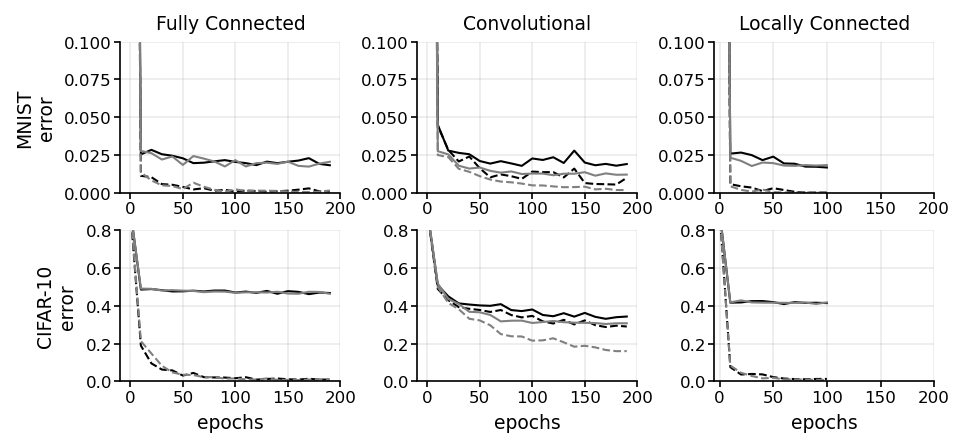

In [8]:
plot_results(vec_results, 'mono', colors=['black', '0.5'])
plt.savefig('../figs/vec_mono_comparisons.pdf', bbox_inches='tight')

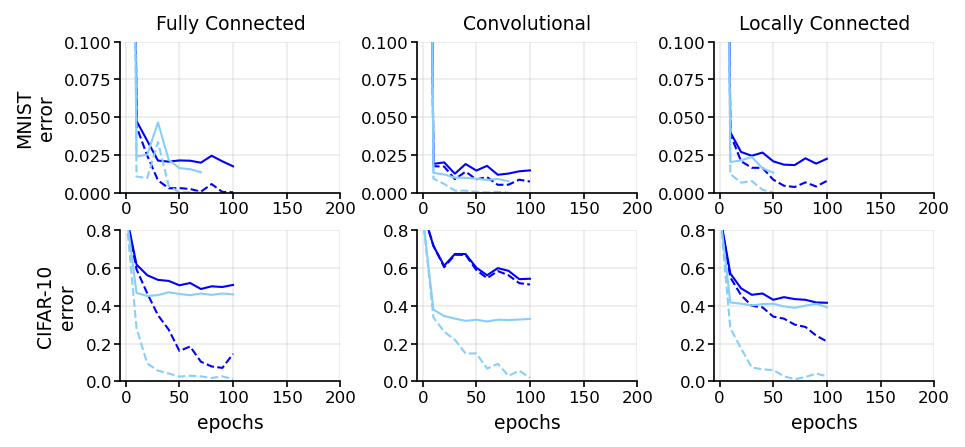

In [9]:
plot_results(nonvec_results, 'mono', colors=['blue', 'lightskyblue'])
plt.savefig('../figs/nonvec_mono_comparisons.pdf', bbox_inches='tight')

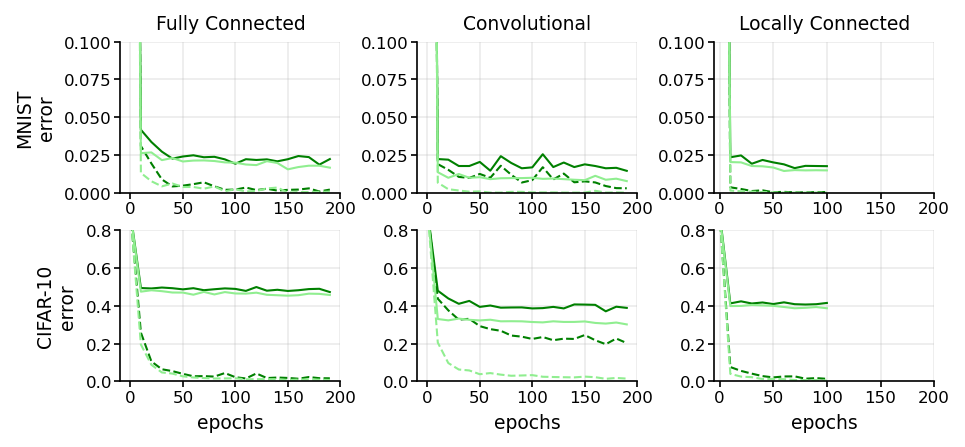

In [10]:
plot_results(vec_results, 'mixed', colors=['green', 'lightgreen'])
plt.savefig('../figs/vec_mixed_comparisons.pdf', bbox_inches='tight')

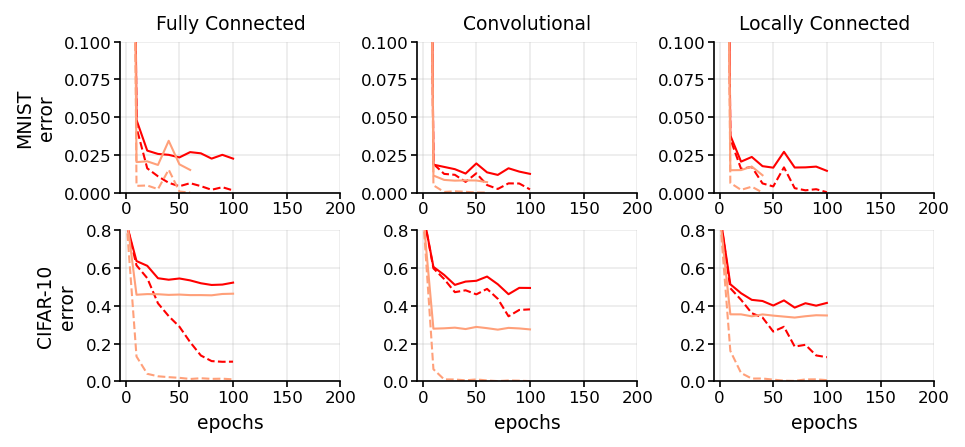

In [11]:
plot_results(nonvec_results, 'mixed', colors=['red', 'lightsalmon'])
plt.savefig('../figs/nonvec_mixed_comparisons.pdf', bbox_inches='tight')

In [12]:
def plot_acc_2(ax, acc1, acc2, acc3, y_max=1.0, legend=False):
    colors = ['black', 'red', 'blue']
    ax.plot(1-acc1[:, 0], ls="--", color=colors[0], lw=1)
    ax.plot(1-acc1[:, 1], ls="-", color=colors[0], lw=1, label="vectorized, DF$+$")

    ax.plot(1-acc2[:, 0], ls="--", color=colors[1], lw=1)
    ax.plot(1-acc2[:, 1], ls="-", color=colors[1], lw=1, label="unvectorized, DF$\pm$")
    
    ax.plot(1-acc3[:, 0], ls="--", color=colors[2], lw=1)
    ax.plot(1-acc3[:, 1], ls="-", color=colors[2], lw=1, label="unvectorized, DF$+$")

    ax.set_ylim(0, y_max)
    ax.set_yticks([0, y_max*0.25, y_max*0.5, y_max*0.75, y_max*1.0])
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xticklabels([0, 50, 100, 150, 200])
    ax.tick_params(size=3, labelsize=8, pad=1)
    
    if legend:
        ax.legend(ncol=1, fontsize=6, loc="upper right", frameon=False, borderpad=0.1, columnspacing=0.5, handletextpad=0.25)
    
    ax.grid(alpha=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


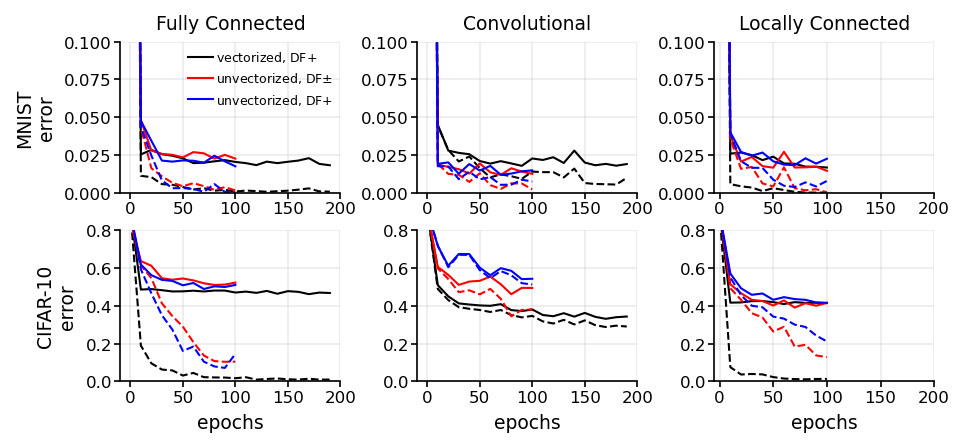

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(7, 3), dpi=150)
fig.subplots_adjust(wspace=0.35, hspace=0.25)

plot_acc_2(axes[0, 0],
           vec_results['mnist']['fc']['df']['mono'],
           nonvec_results['mnist']['fc']['df']['mixed'],
           nonvec_results['mnist']['fc']['df']['mono'], y_max=0.1, legend=True)

plot_acc_2(axes[0, 1],
           vec_results['mnist']['conv']['df']['mono'],
           nonvec_results['mnist']['conv']['df']['mixed'],
           nonvec_results['mnist']['conv']['df']['mono'], y_max=0.1)

plot_acc_2(axes[0, 2],
           vec_results['mnist']['lc']['df']['mono'],
           nonvec_results['mnist']['lc']['df']['mixed'],
           nonvec_results['mnist']['lc']['df']['mono'], y_max=0.1)

plot_acc_2(axes[1, 0],
           vec_results['cifar']['fc']['df']['mono'],
           nonvec_results['cifar']['fc']['df']['mixed'],
           nonvec_results['cifar']['fc']['df']['mono'], y_max=0.8)

plot_acc_2(axes[1, 1],
           vec_results['cifar']['conv']['df']['mono'],
           nonvec_results['cifar']['conv']['df']['mixed'],
           nonvec_results['cifar']['conv']['df']['mono'], y_max=0.8)

plot_acc_2(axes[1, 2],
           vec_results['cifar']['lc']['df']['mono'],
           nonvec_results['cifar']['lc']['df']['mixed'],
           nonvec_results['cifar']['lc']['df']['mono'], y_max=0.8)

axes[0, 0].set_title("Fully Connected", fontsize=9)
axes[0, 1].set_title("Convolutional", fontsize=9)
axes[0, 2].set_title("Locally Connected", fontsize=9)
axes[0, 0].set_ylabel("MNIST\nerror", fontsize=9)
axes[1, 0].set_ylabel("CIFAR-10\nerror", fontsize=9)
for ax in axes[1]:
    ax.set_xlabel("epochs", fontsize=9)
    
plt.savefig('../figs/vec_nonvec_comparisons.pdf', bbox_inches='tight')